# Vertical Line Test

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

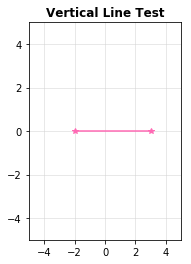

In [14]:
# Vectors
x = [3, -2]
y = [0,0]

# Plotting
fig,ax = plt.subplots()
plt.subplot(1,2,1)
plt.axis([-5,5,-5,5])
plt.plot(x, y, color='hotpink', marker='*', linestyle='-')
plt.title('Vertical Line Test', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.show();

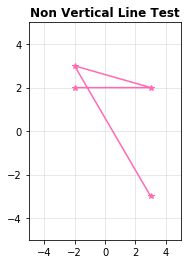

In [20]:
# Vectors
x = [3, -2,3,-2]
y = [-3, 3, 2, 2]

# Plotting
plt.subplot(1,2,2)
plt.axis([-5,5,-5,5])
plt.plot(x, y, color='hotpink', marker='*', linestyle='-')
plt.title('Non Vertical Line Test', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.show();

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

**Functions have one output for any given input.**

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

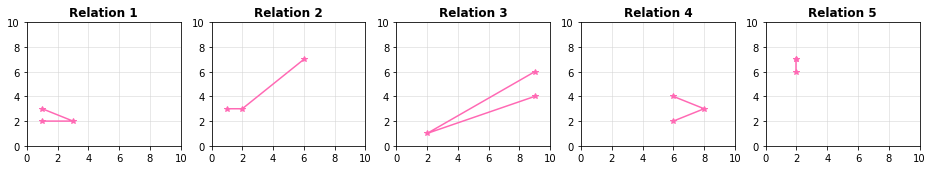

In [28]:
fig,ax = plt.subplots(figsize=(16,5))

# Vectors From Relation 1
v1 = [1,3,1]
v2 = [2,2,3]
# Plotting Relation 1
plt.subplot(2,5,1)
plt.axis([0,10,0,10])
plt.title('Relation 1', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.plot(v1, v2, color='hotpink', marker='*', linestyle='-')

# Vectors From Relation 2
v3 = [1,2,6]
v4 = [3,3,7]
# Plotting Relation 2
plt.subplot(2,5,2)
plt.axis([0,10,0,10])
plt.title('Relation 2', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.plot(v3, v4, color='hotpink', marker='*', linestyle='-')

# Vectors From Relation 3
v5 = [9,2,9]
v6 = [4,1,6]
# Plotting Relation 3
plt.subplot(2,5,3)
plt.axis([0,10,0,10])
plt.title('Relation 3', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.plot(v5, v6, color='hotpink', marker='*', linestyle='-')

# Vectors From Relation 4
v7 = [6,8,6]
v8 = [2,3,4]
# Plotting Relation 4
plt.subplot(2,5,4)
plt.axis([0,10,0,10])
plt.title('Relation 4', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.plot(v7, v8, color='hotpink', marker='*', linestyle='-')

# Vectors From Relation 5
v9 = [2,2,2]
v10 = [6,7,7]
# Plotting Relation 5
plt.subplot(2,5,5)
plt.axis([0,10,0,10])
plt.title('Relation 5', fontsize=(12), fontweight='semibold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.plot(v9, v10, color='hotpink', marker='*', linestyle='-')
plt.show();

**Relation 2 is the only function. The others have multiple outputs for the same thing. **

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

**M : **

*   Input: R^3
*   Output: R^3

**N:**

*  Input: R^4
*   Output: R^2 

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes, you can transform a matrix through multiplication. 

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
pT = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

\begin{align}
qT = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2 \end{bmatrix}
\end{align}


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [36]:
p = [[1, 3],[-1, 2]]
input_v = [3, 4]

traditional_function = np.array([input_v[0] + 3 * input_v[1],
                       -input_v[0] + 2 * input_v[1]])
vector_matrix = np.matmul(p,
                        input_v)

print("Matrix:\n", p)
print("Input:\n", input_v)
print("Traditional Function:", traditional_function)
print("Vector-Matrix Multiplication:", vector_matrix)

Matrix:
 [[1, 3], [-1, 2]]
Input:
 [3, 4]
Traditional Function: [15  5]
Vector-Matrix Multiplication: [15  5]


In [38]:
q = [[4, 1, 2],[-1, 2, 3],[5, 1, -2]]
input_v2 =[3, 4, 5]

traditional_function2 = np.array([4 * input_v2[0] + input_v2[1] + 2 * input_v2[2],
                        -input_v2[0] + 2 * input_v2[1] + 3 * input_v2[2],
                        5 * input_v2[0] + input_v2[1] - 2 * input_v2[2]])
vector_matrix2 = np.matmul(q, input_v2)

print("Matrix:\n", q)
print("Input:\n", input_v2)
print("Traditional Function:", traditional_function2)
print("Vector-Matrix Multiplication:", vector_matrix2)

Matrix:
 [[4, 1, 2], [-1, 2, 3], [5, 1, -2]]
Input:
 [3, 4, 5]
Traditional Function: [26 20  9]
Vector-Matrix Multiplication: [26 20  9]


\begin{align}
p(\begin{bmatrix} 1 \\ 0 \end{bmatrix}) = \begin{bmatrix} 2 \\ -1 \end{bmatrix}
\\
p(\begin{bmatrix} 0 \\ 1 \end{bmatrix}) = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

\begin{align}
pT = \begin{bmatrix} 1 & 3 \\ -1 & 2 \end{bmatrix}
\end{align}

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

You have to first find the eigenvalue to then find the eigenvector. 

Eigenvectors will stay in the same position during transformations, however they can be scaled by another thus, Eigenvalue is the scalar rep of the Eigenvector.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?



*   Threat of overfitting
*   Can eat up processing time with higher dimensions
*   More difficult to explore and create visualizations



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

**Make sure you have at least 5 times the observations **


# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [0]:
import pandas as pd
iris_df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')

In [72]:
iris_df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [73]:
del iris_df['species']

# Set Up PCA Reduction
reduction = PCA(n_components=2, whiten=False)

# Fit To Original 
reduction.fit(iris_df)

# Transform And Place in DF
pca = pd.DataFrame(reduction.transform(iris_df))
pca.head()

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925


In [74]:
# Printing Out
print("PCA Components:\n",reduction.components_)
print("PCA Mean:",reduction.mean_)

PCA Components:
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
PCA Mean: [5.84333333 3.054      3.75866667 1.19866667]


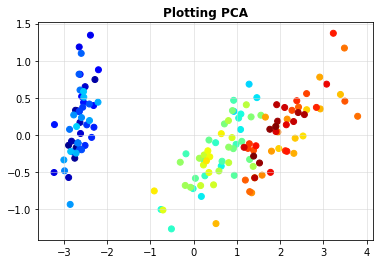

In [99]:
# Plotting
plt.scatter(pca[0], pca[1],c = matplotlib.cm.jet(np.linspace(0, 1, len(pca[1]))))
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)
plt.title("Plotting PCA", fontsize=(12), fontweight='semibold')
plt.show();

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)